# Energy Balance Equation

## IPython Magic Commands

In [1]:
%matplotlib inline
# don't forget about '%matplotlib notebook' for more interactive plots

## Imports

As a reminder, the first code cell will contain our required imports. These can be ignored if you don't want to know the details, just make sure you run the cell by clicking in it and hitting <kbd>shift</kbd> + <kbd>enter</kbd>.

In [5]:
# NBVAL_IGNORE_OUTPUT

# for the interested: it is possible to
# import multiple modules from the same
# package in one line if you separate
# them with a comma like we have done here
from os.path import join, expanduser


import numpy as np
import pandas as pd
import scipy.optimize
import tqdm.autonotebook as tqdman
from pymagicc.io import MAGICCData

import matplotlib.pyplot as plt

import utils

plt.style.use("bmh")

In [6]:
# here we turn off some distracting warnings which can appear
import warnings
import matplotlib

warnings.simplefilter("ignore", matplotlib.MatplotlibDeprecationWarning)

## Constants

In [7]:
DATA_PATH_COMMON = expanduser(join("~", "erth90026_shared", "data"))
DATA_PATH_ME = expanduser(join("~", "CCCM-erth90026-data"))
HADCRUT4_ANNUAL_MEAN_TXT = join(
    DATA_PATH_COMMON, "hadcrut4", "HadCRUT.4.6.0.0.annual_ns_avg.txt"
)

## Summary of Previous Exercise

- Copy the notebooks before getting started
- Google, your classmates and this notebook are resources which you should turn to often
- Ask questions if the code doesn't make sense or you are not sure how to do something. We want you to spend your time thinking about climate and models, with code only being a tool

## Historical Global-mean Temperature

### Background

Global-mean temperature is a key policy metric. In particular, it features prominently in The Paris Agreement, which sets an international framework to avoid the worst effects of anthropogenic climate change. Its Article 2 contains the goal "to limit global temperature increase to well below 2 °C above pre-industrial levels and pursue efforts to limit the temperature increase to 1.5 °C" ([full text here](https://unfccc.int/sites/default/files/english_paris_agreement.pdf)).

It is important to compare model simulations of global-mean temperature with observations. These comparisons provide some validation of the models we use for future projections. This is vitally important as all models are approximations of reality (aka 'all models are wrong, some models are useful').

<div class="alert alert-info">
  <i>Info!</i> As will be discussed later in the course, observations of global-mean temperature are not that simple and they are often a contentious issue. For simplicity, we initially only use one estimate. Later in the course we will add others.
</div>

### Reading data

We start by writing a simple function to load observed global-mean temperatures. You have seen how to read data in the previous notebook. Once again we simply give you the code to load observations. You should take some time to see if you can understand the code e.g. where is the function defined, where is the function used, how is the function used, what do each of the commands mean. Later in the course you will start writing your own reading functions.

,Temperature (rel. to 1961-1990) (K)
Year,
1850,-0.373
1851,-0.218
1852,-0.228
1853,-0.269
1854,-0.248
...,...
2015,0.763
2016,0.797
2017,0.677


<AxesSubplot:xlabel='Year'>

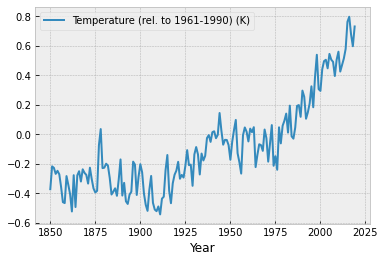

In [8]:
def load_global_mean_temp(file_to_read):
    temperature_data = pd.read_csv(
        file_to_read,
        index_col=0,
        header=None,
        delim_whitespace=True,
        usecols=[0, 1],
        names=["Year", "Temperature (rel. to 1961-1990) (K)"],
    )
    return temperature_data


# Have a look at the output from running our load function.
# You'll see that our load function returns a pandas dataframe.
display(load_global_mean_temp(HADCRUT4_ANNUAL_MEAN_TXT))

# Make a plot of global-mean temperatures over time
load_global_mean_temp(HADCRUT4_ANNUAL_MEAN_TXT).plot()

## The Energy Balance Equation

Now that we have some temperature observations with which to validate our model we are going to start playing with a simple model. (As a reminder, background information on this simple model can for example be found in [Gregory and Forster (2008)](https://doi.org/10.1029/2008JD010405) or also earlier literature as in [Schneider and Thompson (1981)](https://doi.org/10.1029/JC086iC04p03135), each time with slightly different notation. 

We start with the simple energy balance equation from the lecture. 

$$\Delta Q_G = \lambda_G \Delta T_{G} + \frac{dH}{dt} $$

- $\Delta Q_G$ is the global-mean radiative forcing at
the tropopause (W.m<sup>-2</sup>)
- $\lambda_G$ is the global-mean feedback factor
(W.m<sup>-2</sup>.K<sup>-1</sup>)
- $\Delta T_G$ is the surface
temperature pertubation (K)
- $H$ is ocean heat content per unit area (J.m<sup>-2</sup>)
- $t$ is time (s)

Initially we are only going to consider the equilibrium case i.e. the case in which $\frac{dH}{dt} = 0$. In this case our energy balance equation becomes very simple

$$\Delta Q_G = \lambda_G \Delta T_{G}$$

In the next cell, we are going to write a function which takes radiative forcing and global-mean feedback factor as input and returns the corresponding temperature change. This is often referred to as 'coding up an equation' i.e. implementing a mathematical equation in code.

<div class="alert alert-warning">
  <i>Warning!</i> 'lambda' is a special keyword in  python so you can't call your input argument that. You  can tell that lambda is a special keyword because it turns green if you type it in a code block (to try this, make a new code cell by clicking on Insert --> Insert Cell Below, then type 'lambda').
</div>

<div class="alert alert-info">
  <i>Info!</i> To uncomment lines, use <kbd>cmd</kbd> + <kbd>/</kbd> on a mac or <kbd>Ctrl</kbd> + <kbd>/</kbd> on windows.
</div>

In [11]:
def simple_energy_balance(Q, feedback_factor):
    # uncomment the lines below and then complete the function
    # use the line below as a template for writing your own code
    #     temperature = calculation_of_temperature_goes_here
    temperature = Q/feedback_factor
    return temperature

In [12]:
def simple_energy_balance(Q, feedback_factor):
    # as shown by the equation above, temperature is given by Q divided by the feedback factor aka lambda
    temperature = Q / feedback_factor
    return temperature

## Investigating the Behaviour of Our Simple Model

### Example Usage

To give you some code which you can then tweak yourself, we provide two examples of how to run and plot the model.

#### Simple example usage

In [13]:
# define our radiative forcing
Q = np.arange(0, 8, 0.025)

# start a dataframe for radiative forcing
world_df = utils.start_world_df(Q)

In the cell below, notice how we use the function we wrote previously rather than writing out the same calculation in multiple places (i.e. we avoid copying code).

In [14]:
# calculate the temperature change, putting the result in our dataframe
world_df["T"] = simple_energy_balance(Q, feedback_factor=1.36)

array([<AxesSubplot:xlabel='Time', ylabel='Q'>,
       <AxesSubplot:xlabel='Time', ylabel='T'>], dtype=object)

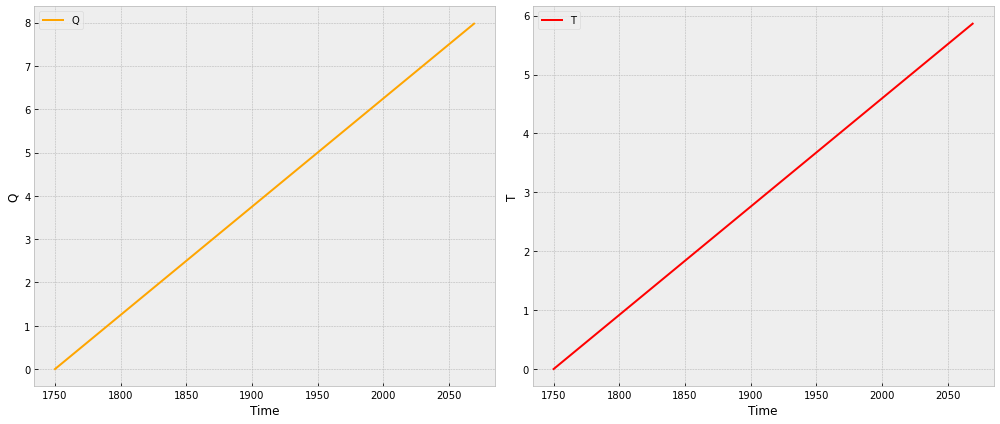

In [15]:
# plot the result
utils.plot_world_df(world_df)

#### Another example

In [ ]:
Q_sin = np.sin(np.linspace(0, 8, 12)) + np.linspace(0, 1, 12)
world_df = utils.start_world_df(Q_sin)
world_df["T"] = simple_energy_balance(Q_sin, feedback_factor=1.36)
utils.plot_world_df(world_df)

In the cells above or in a new cell below, have a go at making some plots for yourself. Try changing the radiative forcing (Q) as well as the value of the global-mean feedback factor and see what changes.

### Climate Feedback Parameter

Uncertainty in the value of the climate feedback parameter, $\lambda_G$, means that it's 5-95% likely range is approximately [0.83, 2.5] W.m$^{-2}$.K$^{-1}$. Have a go at remaking your plots but now vary the value of the feedback parameter over this range and other ranges. 

- What impact does it have on your temperature pathways, if you change the feedback parameter?
- Why do different values of climate sensitivity matter?

#### Example: making plots with different values of the climate feedback parameter

In [ ]:
axes = None
Q_df = utils.start_world_df(np.arange(0, 8, 0.01))
feedback_paras = np.arange(1.0, 2.0, 0.1)

# using enumerate means that the variable 'i' will count which iteration of the loop we're on
# climate_feedback_para will contain the value from the list feedback_paras
for i, climate_feedback_para in enumerate(feedback_paras):
    Q_df["T"] = simple_energy_balance(
        Q_df["Q"], feedback_factor=climate_feedback_para
    )

    axes = utils.plot_world_df(
        Q_df,
        axes=axes,
        label="$\lambda_G$ = {:.2f} W / m^2 / K".format(
            climate_feedback_para
        ),
        color=(i / len(feedback_paras), 0, 0),
        alpha=0.7,
    )

Make sure you understand how the `for` loop works in the cell above. Once you have, try changing the values which are looped over either in the cell above or a new cell.

### Reconciling Observations and Our Model

Now that you have a feel for how our model behaves, we're going to see if we can make it reproduce historically observed temperatures.

In the next cell, we make a plot to compare the predicted temperature change by our model and observed historical temperatures.

<div class="alert alert-warning">
  <i>Warning!</i> As our model is a perturbation model, i.e. simulates global-mean temperature change from some pre-industrial equilibrium, we have to be a little bit careful when comparing it to observations. In particular, we have to make sure that we are comparing the change from the same baseline. In other words, zero has to be at the same point (if the observations are relative to the 1961-1990 mean then our model results should also be reported relative to the 1961-1990 mean). 
</div>

In [ ]:
# load an estimate of historical radiative forcing
model_df = utils.read_ar6_erf_file(
    join(
        DATA_PATH_COMMON,
        "ar6_erf_data",
        "AR6_ERF_1750-2019.csv",
    )
)
model_df["T"] = simple_energy_balance(
    model_df["Q"], feedback_factor=1.36
)

# load observed temperatures
observed = load_global_mean_temp(HADCRUT4_ANNUAL_MEAN_TXT)

# now plot the model versus observations.
utils.plot_model_vs_obs(model_df, observed)

# BTW: you are provided with this little helper function "plot_model_vs_obs", which automatically
# adjusts the temperature timeseries to have a zero mean over 1961-1990
# (For those wanting to know the details:
# You can look up the little helper function and how it adjusts the timeseries
# at the end of the utils.py file in this folder week_1, where the function
# 'plot_model_vs_obs' is defined.)

As you can see, the two are surprisingly close at some points in time. However the large drops in model temperature are clearly not reflected in the real world and we're too warm towards the end of the 20$^{\text{th}}$ Century. To finish this exercise, we're going to look at how we can reduce this difference. 

#### Tune feedback parameter


In the next cell, try varying the value of the feedback parameter and see if you can make the fit between the model prediction and observations better.

In [ ]:
model_df["T"] = simple_energy_balance(
    model_df["Q"], feedback_factor=1.36
)

utils.plot_model_vs_obs(model_df, observed)

In the next cell, write a `for` loop to see how the model's behaviour varies as a function of the feedback factor.

In [ ]:
# write your loop here
# a hint can be found below

In [ ]:
# your code should look something like this
# for feedback_factor in values_to_plot:
#     run_model
#     make_plot

In [ ]:
# a further hint is below

In [ ]:
# # we did this with code like
# for feedback_factor in np.arange(lower_limit, upper_limit, step_size):
#     calculation of temperature using simple_energy_balance
#     plot using utils.plot_model_vs_obs

In [ ]:
# our solution is below

In [ ]:
# This produces lots of plots, but gets the job done
for f in np.arange(0.2, 3.51, 0.5):
    model_df["T"] = simple_energy_balance(
        model_df["Q"], feedback_factor=f
    )

    utils.plot_model_vs_obs(model_df, observed)

    # and if you want to know, which plot row belongs to which paramater,
    # you could insert that information as titles for the axes for example like this.
    plt.suptitle(f"Model feedback parameter {f:.2f} W / m^2 / K")
    # this line neatens things up (see what happens if you remove it)
    plt.tight_layout()

Clearly, varying the value of parameters by hand is a very inefficient and error-prone way of finding a good fit. Fortunately, a number of packages exist which can do this sort of fitting for us. Examining how they work in detail now is beyond the scope of the course. For those who are interested, we provide an example of doing an optimisation in the extension.

Hopefully you have now found a value for the feedback factor which allows our simple model to somewhat reproduce observed temperature changes over the 21<sup>st</sup> Century. Does this value make sense to you? (In particular, think about our assumption of equilibrium.) Be ready to discuss your answers in next week's tutorial.

## Summary

- A simple energy balance model provides a simple way to simulate global-mean temperature response to radiative forcing
- In equilibrium with sufficient tuning, it can somewhat reproduce observed global-mean temperatures, this may be good enough for some applications

## Conclusion

We have examined the behaviour of our simple energy balance model

$$\Delta Q_G = \lambda_G \Delta T_{G} + \frac{dH}{dt}$$

in equilibrium (i.e. assuming $\frac{dH}{dt}=0$). We looked at how it is able to reproduce observations. In the extension, we show how to examine how it responds to different radiative forcing scenarios and how a non-equilibrium assumption can be (somewhat) included.

You should also now have a feel for how the notebooks we will use in this course work and have been able to run the notebooks and produce a number of plots.

In the next lecture we will move onto radiative forcing and its link with concentrations. This adds a new link in our cause-effect chain, on top of the one we have explored today between radiative forcing and global-mean temperature. 

That concludes exercise 1, we look forward to seeing you next week to discuss it in class!

## Acknowledgements

These notebooks are supported by Science IT at the University of Melbourne.

## Extensions

<div class="alert alert-warning">
  <i>Warning!</i> The code in this section becomes significantly more complicated. If coding is not something you are very familiar with, start by focussing on the text and outputs, then come back and look at the code after.
</div>

### Running with different radiative forcing pathways

Here we show how we can make projections with our model. That is, we project temperature for different radiative forcing pathway inputs. We take our radiative forcing pathway inputs from the quantification of radiative forcing produced as part of the AR6 process (https://github.com/chrisroadmap/ar6/tree/main/data_output/SSPs).

In [ ]:
# first, we define our ssps and the colour we want to use for each SSP as a dictionary.
plot_colors = {
    "ssp119": "cyan",
    "ssp126": "tab:blue",
    "ssp245": "green",
    "ssp434": "blue",
    "ssp460": "yellow",
    "ssp370": "orange",
    "ssp585": "red",
    "ssp534-over": "hotpink",
}

# second, we create a dictionary to hold the ssps, their data,
# their colour etc all in one place using a 'dictionary
# comprehension'
ssps = {ssp: {"colour": plot_colors[ssp]} for ssp in plot_colors}

for ssp in ssps:
    file_name = "ERF_{}_1750-2500.csv".format(
        ssp
    )  # doing a substitution like this requires regulary-named files
    ssps[ssp]["df"] = utils.read_ar6_erf_file(
        join(
            DATA_PATH_COMMON,
            "ar6_erf_data",
            "AR6_ERF_{}_1750-2500.csv".format(ssp),
        )
    )

# fourth, we calculate our simple model's response to each of
# the forcing timeseries
for ssp in ssps:
    ssps[ssp]["df"]["T"] = simple_energy_balance(
        ssps[ssp]["df"]["Q"], feedback_factor=1.36
    )

# lastly, we make a plot with our simple model's response to
# each of the ssp forcing timeseries
axes = None
for ssp in ssps:
    axes = utils.plot_world_df(
        ssps[ssp]["df"], axes=axes, label=ssp, color=ssps[ssp]["colour"]
    )

### Your Turn

Now that you've seen how to run and plot the results from our model, it's your turn. Try changing the radiative forcing pathways and seeing how the model responds. 

- Can you find a pathway which stays under 2K, 1.5K?
- Do any pathways exceed 10K warming by 2150?

<div class="alert alert-info">
  <i>Info!</i> Your starting point will probably be copying and pasting some of the code above so you can modify it for yourself. 
</div>

In [ ]:
# have a go making and plotting your own scenarios here

# some useful example code snippets may include:
# - alter the value of the year 1980
# df.loc[1980]['Q'] = 12.

# - alter the value of the years 1975-1991
# df.loc[1975:1991]['Q'] = 12.3

<div class="alert alert-danger">
  <i>Danger!</i> In more complex projects, duplicating code like this is very likely to backfire (see number 1 in  <a href="https://blog.codacy.com/7-software-development-shortcuts-that-will-backfire-50f56612264c">this article</a> ).

  Hence, whilst we while we will ocassionally make this error whilst teaching for simplicity's sake, you should be aware that it is completely the opposite of good practice and should avoid it when writing your own code.

  Instead of duplicating code, it is much better to put things which you will use frequently into functions or modules which can be reused. That way, if you find a bug/error, you only need to fix it once!
</div>

<div class="alert alert-info">
  <i>Info!</i> The resources from <a href="https://www.digitalocean.com/community/tutorials/how-to-define-functions-in-python-3">Digital Ocean</a> are a great starting point for learning more about functions, modules, loops and everything else Python.
</div>

Having experimented with different radiative forcing pathways and their equilibrium warming, think about how transient warming might behave. Specifically, we would like you to consider the following: 

- If you want to meet a given temperature goal in 2100, does the radiative forcing pathway make any difference or is it only the value of radiative forcing in 2100 which matters? 

Write down some thoughts about what this means about the simple equilibrium model, we will return to these later in the notebook and in the course.

#### Estimate Ocean Heat Uptake

Returning to our original energy balance equation, 

$$\Delta Q_G = \lambda_G \Delta T_{G} + \frac{dH}{dt}$$

we recall that we have been assuming that ocean heat uptake has been zero throughout this exercise. As we know, this is a highly idealised assumption. Hence, the other way to find out why our default model differs from observed temperatures would be to take a median estimate of the global-mean feedback factor and estimate the amount of ocean heat uptake required for our model to fit observations, i.e. solving

$$\frac{dH}{dt} = \Delta Q_G - \lambda_G \Delta T_{G}$$

The tricky part here is that we need our temperature observations to be relative to pre-industrial. As we don't have pre-industrial temperature observations, for now the best we can do is compare them to some early reference period (investigating the impact of choices like this is something we will consider later in the course).

In [ ]:
# Remember: if the code here is confusing, you can simply run it and skip
# to the next cell. It is merely defining a helper function and
# showing how it behaves with a plot.

# Define a function to read in observed temperatures and
# historical radiative forcing and return them on the same time
# axis.
def load_obs_historical_rf_common_time(
    plot=False, base_period=[1850, 1900]
):
    # First we average the observations to annual values
    observed = load_global_mean_temp(HADCRUT4_ANNUAL_MEAN_TXT)

    # then we make observations relative to baseline
    start = base_period[0]
    end = base_period[1]
    observed_annual_mean_baselined = (
        observed - observed.loc[start:end].mean()
    )

    # next we load historical RF
    Q = utils.read_ar6_erf_file(
        join(
            DATA_PATH_COMMON,
            "ar6_erf_data",
            "AR6_ERF_1750-2019.csv",
        )
    )

    # then we find their common years
    common_time = Q.index.intersection(
        observed_annual_mean_baselined.index
    )
    observed_annual_mean_baselined_common_time = (
        observed_annual_mean_baselined.loc[common_time]
    )
    Q_common_time = Q.loc[common_time]

    # if we want, we can now make a plot
    if plot:
        fig, axes = plt.subplots(figsize=(14, 6), nrows=1, ncols=2)

        observed.iloc[:, 0].plot(ax=axes[0], label="Annual mean obs")
        annual_mean_text = (
            "Annual mean obs\nrelative to {}-{} mean".format(start, end)
        )
        observed_annual_mean_baselined.iloc[:, 0].plot(
            ax=axes[0], label=annual_mean_text
        )
        observed_annual_mean_baselined_common_time.iloc[:, 0].plot(
            ax=axes[0], label=annual_mean_text + " common time", ls="--"
        )
        axes[0].legend()

        Q["Q"].plot(ax=axes[1], label="Raw Q")
        Q_common_time["Q"].plot(
            ax=axes[1], label="Q common time", ls="--"
        )
        axes[1].legend()

    # lastly, returning the values we want in a dictionary
    return {
        "obs_T": observed_annual_mean_baselined_common_time,
        "historical_RF": Q_common_time,
    }


# we can have a look at how the loading function works with
load_obs_historical_rf_common_time(plot=True, base_period=[1861, 1880])

In [ ]:
inputs = load_obs_historical_rf_common_time()
feedback_factor = 1.36
ocn_heat_uptake_label = "Ocean Heat Uptake (W.m$^{-2}$)"

ocean_heat_uptake = (
    inputs["historical_RF"].iloc[:, 0]
    - feedback_factor * inputs["obs_T"].iloc[:, 0]
).to_frame(name=ocn_heat_uptake_label)

ocean_heat_uptake.plot()

Now, assuming that our default feedback parameter is the correct one. Then we derive this above ocean heat uptake in order to explain historical temperatures. If that is true, then ocean heat uptake is a significant part of the overall energy balance equation (same order of magnitude as radiative forcing) and hence ignoring it makes our equilibrium model highly idealised. Exploring ocean heat content and its impact on climate in more detail will be done later in the course. For now, the key message is that ignoring the ocean's impact on climate makes it very hard to create a model which reproduces observations. 

That the oceans with their huge water masses play a very important role in our climate is intuitively clear. Here, these above equations allow us to comprehend just how important the oceans might be. Without the ocean heat uptake, we would see the equilibrium temperature response, i.e. a much higher warming. Oceans hence act like a very big buffer, i.e. creating inertia in the Earth System. 

For those who are interested, we show below how you can convert from energy flux into the ocean into absolute ocean heat content. 

In [ ]:
# NBVAL_IGNORE_OUTPUT
fig, axes = plt.subplots(figsize=(14, 6), nrows=1, ncols=2)
ocean_heat_uptake.plot(ax=axes[0])

seconds_per_year = 60 * 60 * 24 * 365  # s
area_of_earth = 510.1 * 10 ** 12  # m^2
energy_flux_to_absolute_conversion_factor = (
    seconds_per_year * area_of_earth
)
ocean_heat_uptake_cumulative = (
    ocean_heat_uptake[ocn_heat_uptake_label].cumsum()
    * energy_flux_to_absolute_conversion_factor
)
ocean_heat_uptake_cumulative.plot(
    ax=axes[1], label="Cumulative Ocean Heat Uptake (J)"
)
axes[0].set_ylabel("Ocean Heat Uptake (W m$^{-2}$)")
axes[1].set_ylabel("Cumulative Ocean Heat Uptake (Joule)")
axes[1].legend()

On the right side in the above plots, you see the overall heat gain by the oceans in Joule. A lot of Joule's, i.e. 10$^{23}$. That is usually the unit (and magnitude) in which the heat gain by the oeans is measured and it lets us estimate the extent to which the ocean thermosteric expansion (i.e. warm water expands) contributed to sea level rise (but more on that later). 


Lastly we show how the full picture of radiative forcing, increases in global-mean temperature and ocean heat content looks when put all together. Such a figure shows how much heat the ocean must have taken up if we assume that our simple model is an adequate representation of the Earth, that we have good observations of global-mean temperatures, that we have a good estimate of historical radiative forcing and that the global-mean feedback factor is 1.36 W.m$^{-2}$.K$^{-1}$. Clearly, these are a lot of assumptions which we would investigate much more thoroughly before making any strong claims.

In [ ]:
fig, axes = plt.subplots(figsize=(14, 6), nrows=2, ncols=2)

inputs["historical_RF"].plot(ax=axes[0, 0], color="orange")
axes[0, 0].set_ylabel("W m$^{-2}$")

inputs["obs_T"].plot(ax=axes[0, 1], color="red")
axes[0, 1].set_ylabel("K")

ocean_heat_uptake.plot(ax=axes[1, 0])
axes[1, 0].set_ylabel("W m$^{-2}$")

ocean_heat_uptake_cumulative.plot(
    ax=axes[1, 1],
    label="Cumulative Ocean Heat Uptake (J)",
    color="green",
)
axes[1, 1].set_ylabel("J")
axes[1, 1].legend()
plt.tight_layout()  # fix the spacing in our plot

#### Comment

Reconciling observations and our model is clearly possible if we vary either climate feedback parameter, the ocean heat uptake, or both. At the moment, both of these quantities are unknowns for us and we have no way of constraining them. That is to say: at this point in the course, we don't know... but yes, there are methods to do this constraining - more on that later. Hence, whilst we can make our model match up with observations, we don't know if the assumptions we're making in doing so are valid or not. 

Later in the course we'll look at ways to constrain these quantities and many other key parameters. This will allow us to have more confidence in our model's behaviour and make a better assessment of whether it is appropriate for use in a given context or not.

### Optimising Climate Feedback Factor

Here we show how you can optimise the climate feedback factor using SciPy's `optimize` package. We have initially hidden our solution in case you want to have a go yourself first (you may come up with a better solution than us!).

In [ ]:
# if you wish, try deriving your own solution here

In [ ]:
# define a function to return the difference between observations
# and temperature for a given value of the feedback_factor.
# Because of the way the scipy.optimize library works, we have to
# put the parameter we want to tune, in this case feedback_factor,
# as the first argument (i.e. argument order matters here)
def obs_model_difference(feedback_factor, assumed_Q, T_observed):
    out = assumed_Q.copy()

    out["T"] = simple_energy_balance(
        assumed_Q["Q"].values.squeeze(), feedback_factor
    )
    # rebaseline to do fair comparison
    T_model_baseline = out["T"] - out["T"].loc[1850:1900].mean()
    T_observed -= T_observed.loc[1850:1900].mean()
    return np.array(
        T_observed.values.squeeze() - T_model_baseline.values.squeeze()
    )


# do the optimisation
p0 = 1.36
inputs = load_obs_historical_rf_common_time()
T_observed = inputs["obs_T"]
assumed_Q = inputs["historical_RF"]
popt, pcov = scipy.optimize.leastsq(
    obs_model_difference, p0, args=(assumed_Q, T_observed)
)

feedback_factor_optimal = popt[0]
print(
    "Optimized feedback parameter is {:.2f} W/m^2/K".format(
        feedback_factor_optimal
    )
)

# plot the results
res = assumed_Q.copy()
res["T"] = simple_energy_balance(
    assumed_Q["Q"], feedback_factor=feedback_factor_optimal
)
utils.plot_model_vs_obs(res, T_observed, ref_period=[1850, 1900])

The optimisation produces a result which is suprisingly similar to observations given how simple our model is. Hence, in some cases, one could think that even a simple model without heat-uptake may be adequate. The earliest climate models just consisted of an atmosphere and the Earth's thermal inertia was either not at all, or only simplistically taken into account. However, given that we know about the Earth's system's properties with ocean inertia and so on, there are few justifications for not taking it into account for future projections. Hence we will include ocean inertia etc. later on in this course. 